In [1]:
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
from scipy.signal.windows import hann

In [2]:
y, sr = librosa.load('./21111.wav', sr = 176400)
# A3 220Hz
print('length of input is', len(y), 'sample rate = ', sr)

length of input is 480013 sample rate =  176400


In [4]:
import math
math.e**(-2*(math.pi**2))

2.675287991074246e-09

# Exact Frequencies: 

$ Sample   rate = 176400, n_fft = 2^{19}= 262144 $

The window duration will be $ (262144/176400)/4 = 3s /4 = 0.7s $

$ Accuracy = sr/(n _  fft+2) = 0.6 $ 


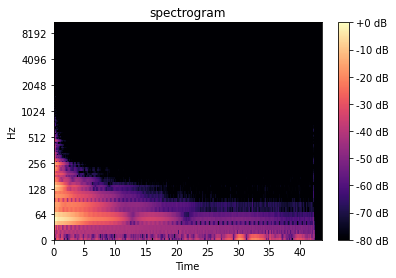

In [3]:
k = 2048
h = int(k/8)
A = librosa.stft(y, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_A = np.abs(A)
librosa.display.specshow(librosa.amplitude_to_db(abs_A, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

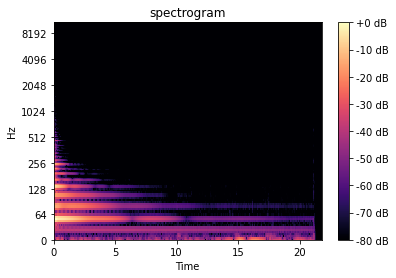

In [4]:
k = 4096
h = int(k/8)
A = librosa.stft(y, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_A = np.abs(A)
librosa.display.specshow(librosa.amplitude_to_db(abs_A, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

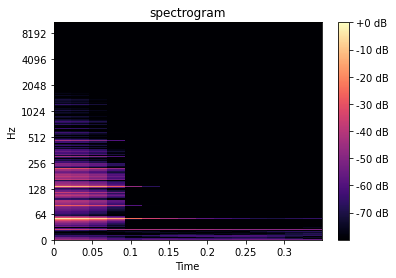

In [5]:
k = 262144
h = int(k/8)
A = librosa.stft(y, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_A = np.abs(A)
librosa.display.specshow(librosa.amplitude_to_db(abs_A, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [187]:
from IPython.display import Audio
def playHard(data):
    return Audio(data, rate = sr)
def play(data, soft = .1):
    t = np.concatenate([data, [1]])
    length = round(soft * sr)
    t[:length ] = np.multiply(t[:length ], np.linspace(0, 1, length))
    t[-length:] = np.multiply(t[-length:], np.linspace(1, 0, length))
    return playHard(t)


In [188]:
play(y)

In [6]:
print(abs_A.shape)
print(len(abs_A[:, 0]))

(131073, 15)
131073


220.04241943359375 2
440.0848388671875 3
660.1272583007812 4
880.169677734375 5
1100.2120971679688 6
1320.2545166015625 7
1540.2969360351562 8
1760.33935546875 9
1980.3817749023438 10
2200.4241943359375 11
2420.4666137695312 12
2640.509033203125 13
2860.5514526367188 14
3080.5938720703125 15
3300.6362915039062 16
3520.6787109375 17
3740.7211303710938 18
3960.7635498046875 19
4180.805969238281 20


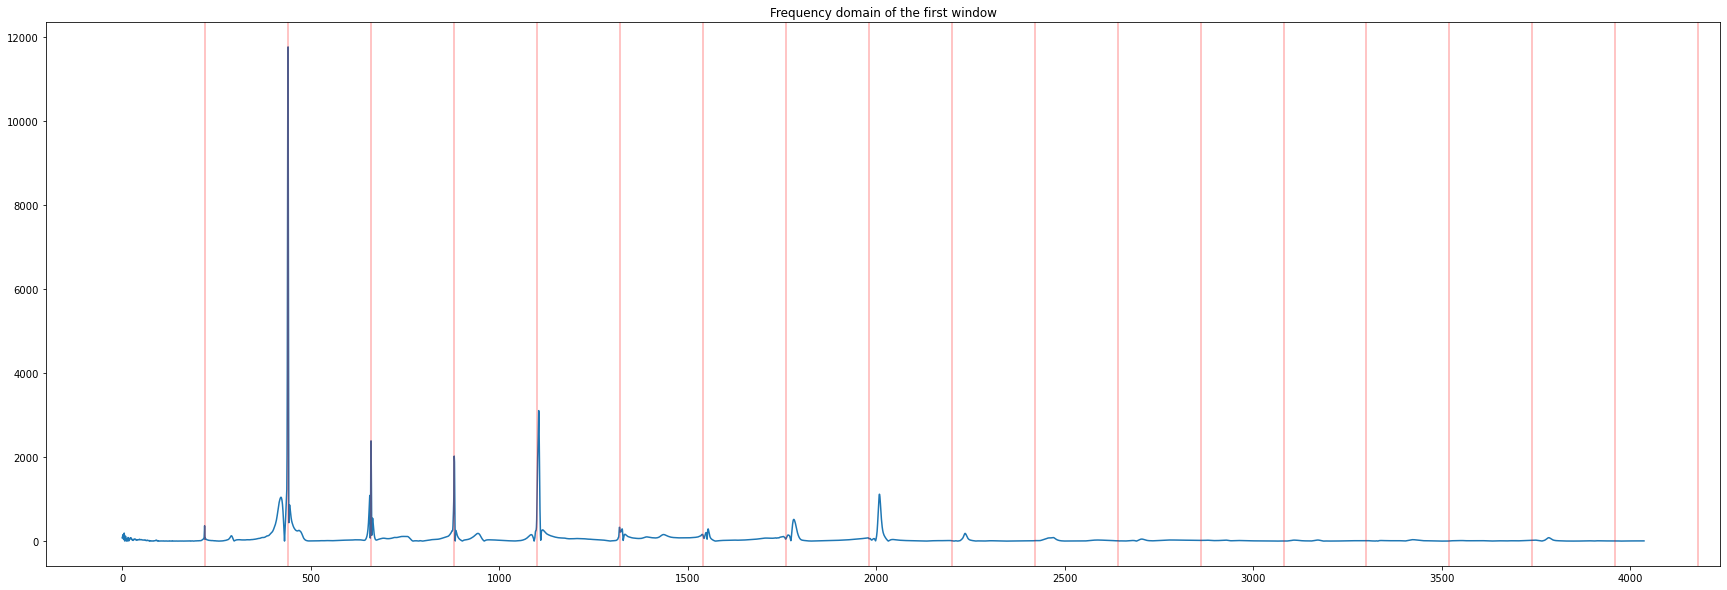

In [10]:
W_0 = abs_A[:6000, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_A = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
plt.plot(freq_A[:6000], W_0)
plt.title('Frequency domain of the first window')


for i in range(0, len(W_0), 1):
    if W_0[i] > 2000 and W_0[i - 1] < W_0[i] and W_0[i] > W_0[i + 1]:
        base_freq = freq_A[i]/2
        break

# base_freq=223
i = 1
freq = 0
while freq < 4000:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    print(freq, i)
    
plt.savefig("./" +'Figure1'+".png")
plt.show()

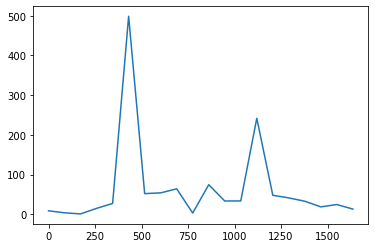

In [197]:
_f = librosa.fft_frequencies(sr=sr, n_fft=2048)
plt.plot(_f[:20], np.abs(np.fft.rfft(y[2048:4096])[:20]))

In [142]:
print(freq_A[:5])

[0.         0.6729126  1.3458252  2.01873779 2.69165039]


In [143]:
for i in range(4000):
    print(i, freq_A[i], W_0[i])

0 0.0 78.156395
1 0.67291259765625 90.98982
2 1.3458251953125 125.71646
3 2.01873779296875 151.85219
4 2.691650390625 101.8847
5 3.36456298828125 54.498875
6 4.0374755859375 36.967335
7 4.71038818359375 75.11863
8 5.38330078125 190.77621
9 6.05621337890625 132.24115
10 6.7291259765625 4.1876984
11 7.40203857421875 1.8489466
12 8.074951171875 75.18041
13 8.74786376953125 117.31201
14 9.4207763671875 104.286095
15 10.09368896484375 65.73383
16 10.7666015625 14.446204
17 11.43951416015625 6.5145454
18 12.1124267578125 59.091785
19 12.78533935546875 51.517963
20 13.458251953125 1.3489153
21 14.13116455078125 11.31166
22 14.8040771484375 60.189556
23 15.47698974609375 85.05434
24 16.14990234375 77.013664
25 16.82281494140625 40.853855
26 17.4957275390625 4.1912785
27 18.16864013671875 16.446869
28 18.841552734375 17.721674
29 19.51446533203125 44.51177
30 20.1873779296875 67.13805
31 20.86029052734375 68.65518
32 21.533203125 58.805103
33 22.20611572265625 61.8479
34 22.8790283203125 80.733

309 207.92999267578125 8.543884
310 208.6029052734375 10.00477
311 209.27581787109375 11.373881
312 209.94873046875 13.875106
313 210.62164306640625 17.598764
314 211.2945556640625 21.609001
315 211.96746826171875 25.51914
316 212.640380859375 29.204165
317 213.31329345703125 33.0002
318 213.9862060546875 39.831707
319 214.65911865234375 44.696224
320 215.33203125 48.77359
321 216.00494384765625 52.97611
322 216.6778564453125 61.033794
323 217.35076904296875 60.381447
324 218.023681640625 187.1446
325 218.69659423828125 364.78876
326 219.3695068359375 202.92384
327 220.04241943359375 42.1003
328 220.71533203125 66.983696
329 221.38824462890625 51.876354
330 222.0611572265625 47.464397
331 222.73406982421875 42.34691
332 223.406982421875 38.45267
333 224.07989501953125 33.31361
334 224.7528076171875 30.634928
335 225.42572021484375 28.455011
336 226.0986328125 27.598463
337 226.77154541015625 27.840088
338 227.4444580078125 26.3105
339 228.11737060546875 22.181133
340 228.790283203125 1

707 475.74920654296875 192.12434
708 476.422119140625 178.88283
709 477.09503173828125 164.46132
710 477.7679443359375 149.19305
711 478.44085693359375 133.03967
712 479.11376953125 116.93189
713 479.78668212890625 102.0948
714 480.4595947265625 88.54942
715 481.13250732421875 75.98822
716 481.805419921875 64.972725
717 482.47833251953125 56.156483
718 483.1512451171875 49.074234
719 483.82415771484375 42.28519
720 484.4970703125 35.724556
721 485.16998291015625 30.252182
722 485.8428955078125 25.896925
723 486.51580810546875 22.14609
724 487.188720703125 18.857817
725 487.86163330078125 15.942448
726 488.5345458984375 13.822325
727 489.20745849609375 12.263676
728 489.88037109375 10.250786
729 490.55328369140625 8.549433
730 491.2261962890625 7.3884616
731 491.89910888671875 6.254004
732 492.572021484375 5.4224935
733 493.24493408203125 4.4051895
734 493.9178466796875 3.426659
735 494.59075927734375 3.3980372
736 495.263671875 3.425279
737 495.93658447265625 3.1523445
738 496.60949707

1374 924.5819091796875 64.442444
1375 925.2548217773438 67.46624
1376 925.927734375 70.82387
1377 926.6006469726562 74.64542
1378 927.2735595703125 78.26631
1379 927.9464721679688 81.63368
1380 928.619384765625 85.06927
1381 929.2922973632812 88.75131
1382 929.9652099609375 92.6885
1383 930.6381225585938 96.86769
1384 931.31103515625 101.32689
1385 931.9839477539062 106.038864
1386 932.6568603515625 110.727356
1387 933.3297729492188 115.55722
1388 934.002685546875 121.02862
1389 934.6755981445312 126.57648
1390 935.3485107421875 131.8397
1391 936.0214233398438 137.13335
1392 936.6943359375 142.66644
1393 937.3672485351562 148.48729
1394 938.0401611328125 154.11858
1395 938.7130737304688 159.50229
1396 939.385986328125 164.59694
1397 940.0588989257812 169.20972
1398 940.7318115234375 173.52924
1399 941.4047241210938 177.33865
1400 942.07763671875 180.20357
1401 942.7505493164062 181.9845
1402 943.4234619140625 182.89186
1403 944.0963745117188 183.06021
1404 944.769287109375 182.00374
14

2040 1372.74169921875 61.696026
2041 1373.4146118164062 61.683647
2042 1374.0875244140625 61.85963
2043 1374.7604370117188 62.39378
2044 1375.433349609375 62.87672
2045 1376.1062622070312 63.376926
2046 1376.7791748046875 64.16079
2047 1377.4520874023438 65.18012
2048 1378.125 66.46974
2049 1378.7979125976562 67.73813
2050 1379.4708251953125 68.987434
2051 1380.1437377929688 70.69987
2052 1380.816650390625 72.82175
2053 1381.4895629882812 74.960434
2054 1382.1624755859375 77.20522
2055 1382.8353881835938 79.605125
2056 1383.50830078125 82.0388
2057 1384.1812133789062 84.480125
2058 1384.8541259765625 86.735214
2059 1385.5270385742188 88.93438
2060 1386.199951171875 91.06195
2061 1386.8728637695312 93.01706
2062 1387.5457763671875 94.83991
2063 1388.2186889648438 96.2342
2064 1388.8916015625 97.293884
2065 1389.5645141601562 98.333496
2066 1390.2374267578125 99.198784
2067 1390.9103393554688 99.81737
2068 1391.583251953125 100.06462
2069 1392.2561645507812 99.717705
2070 1392.9290771484

2706 1820.9014892578125 3.4704769
2707 1821.5744018554688 3.0699682
2708 1822.247314453125 2.7068067
2709 1822.9202270507812 2.189437
2710 1823.5931396484375 1.6892442
2711 1824.2660522460938 1.2217432
2712 1824.93896484375 0.82866806
2713 1825.6118774414062 0.43964314
2714 1826.2847900390625 0.0069428934
2715 1826.9577026367188 0.4523686
2716 1827.630615234375 0.85639524
2717 1828.3035278320312 1.1637603
2718 1828.9764404296875 1.3799903
2719 1829.6493530273438 1.6046245
2720 1830.322265625 1.9516902
2721 1830.9951782226562 2.43285
2722 1831.6680908203125 2.7811096
2723 1832.3410034179688 2.9371514
2724 1833.013916015625 3.2365677
2725 1833.6868286132812 3.5689042
2726 1834.3597412109375 3.7614174
2727 1835.0326538085938 3.8967462
2728 1835.70556640625 4.0575423
2729 1836.3784790039062 4.3895235
2730 1837.0513916015625 4.732133
2731 1837.7243041992188 4.920088
2732 1838.397216796875 5.1200366
2733 1839.0701293945312 5.3837795
2734 1839.7430419921875 5.547511
2735 1840.4159545898438 5.

3373 2269.7341918945312 4.4991565
3374 2270.4071044921875 4.5777774
3375 2271.0800170898438 4.6179333
3376 2271.7529296875 4.6750107
3377 2272.4258422851562 4.792835
3378 2273.0987548828125 4.92549
3379 2273.7716674804688 5.0940447
3380 2274.444580078125 5.1963687
3381 2275.1174926757812 5.095563
3382 2275.7904052734375 4.9787636
3383 2276.4633178710938 4.8469133
3384 2277.13623046875 4.690313
3385 2277.8091430664062 4.527524
3386 2278.4820556640625 4.236507
3387 2279.1549682617188 3.9308133
3388 2279.827880859375 3.6274269
3389 2280.5007934570312 3.3533301
3390 2281.1737060546875 3.1116874
3391 2281.8466186523438 2.7352712
3392 2282.51953125 2.3014705
3393 2283.1924438476562 1.9118813
3394 2283.8653564453125 1.4744332
3395 2284.5382690429688 0.9880122
3396 2285.211181640625 0.515667
3397 2285.8840942382812 0.10326961
3398 2286.5570068359375 0.28142324
3399 2287.2299194335938 0.7318435
3400 2287.90283203125 1.2004498
3401 2288.5757446289062 1.7176802
3402 2289.2486572265625 2.2446425
3

In [144]:
for i in range(1000):
    if freq_A[i]<222 and freq_A[i]>218:
        print(freq_A[i], W_0[i])

218.023681640625 187.1446
218.69659423828125 364.78876
219.3695068359375 202.92384
220.04241943359375 42.1003
220.71533203125 66.983696
221.38824462890625 51.876354


In [145]:
for i in range(0, len(W_0), 1):
        if W_0[i] > 500 and W_0[i - 1] < W_0[i] \
                and W_0[i] > W_0[i + 1]:
            print(freq_A[i], W_0[i])

421.2432861328125 1044.3529
440.0848388671875 11773.941
444.122314453125 862.84
656.7626953125 1087.99
660.1272583007812 2387.7437
664.1647338867188 545.1125
880.8425903320312 2025.6987
1104.9224853515625 3108.956
1781.87255859375 516.61633
2008.6441040039062 1116.8153


#  Daniel's Voice

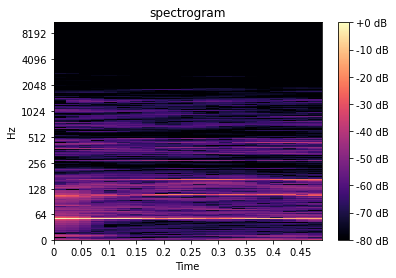

In [11]:
d_v, sr = librosa.load('./Dan_voice.wav', sr = 176400)

k = 262144
h = int(k/8)
DV = librosa.stft(d_v, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_DV = np.abs(DV)
librosa.display.specshow(librosa.amplitude_to_db(abs_DV, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

436.72027587890625 2
873.4405517578125 3
1310.1608276367188 4
1746.881103515625 5
2183.6013793945312 6
2620.3216552734375 7
3057.0419311523438 8
3493.76220703125 9
3930.4824829101562 10
4367.2027587890625 11


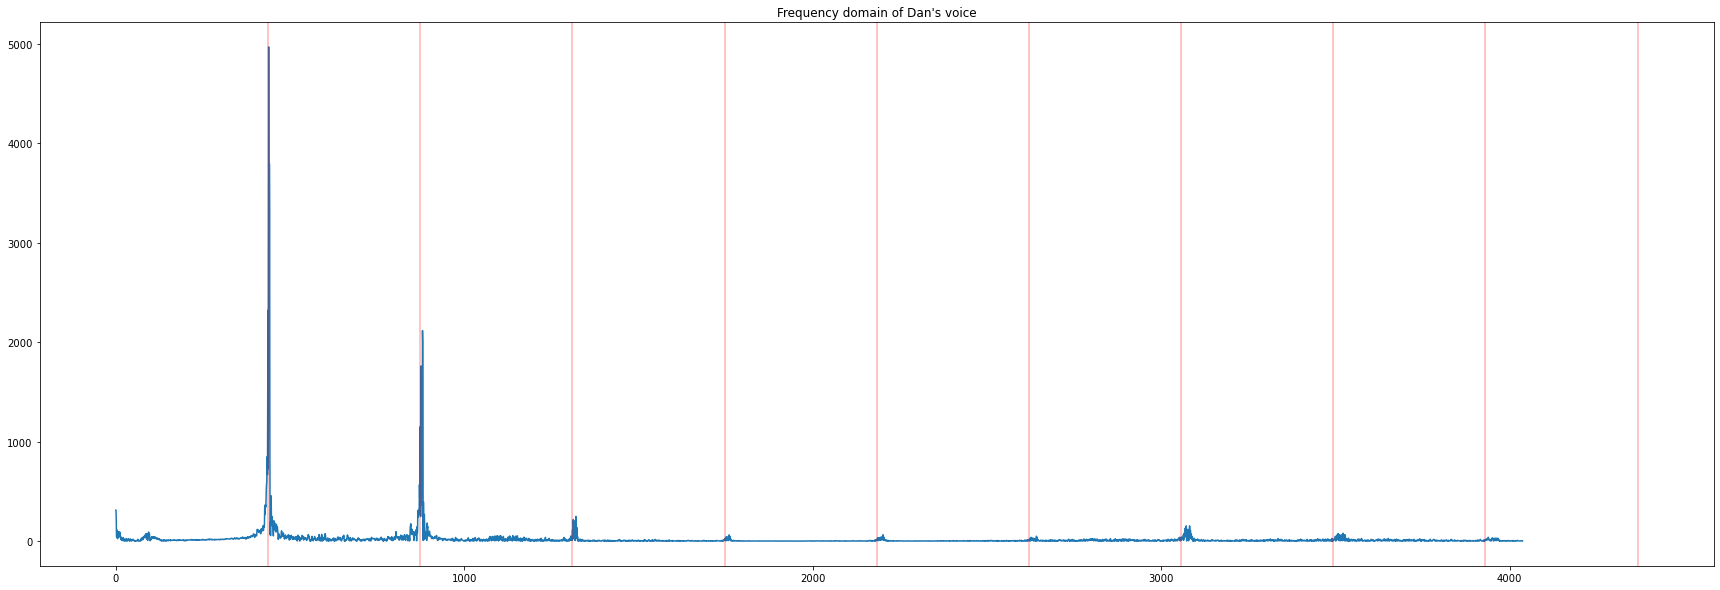

In [14]:
W_D = abs_DV[:6000, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_D = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
# plt.plot(freq_D[:4000], np.log(W_D))
plt.plot(freq_D[:6000], W_D)
plt.title("Frequency domain of Dan's voice")


for i in range(0, len(W_D), 1):
    if W_D[i] > 2000 and W_D[i - 1] < W_D[i] and W_D[i] > W_D[i + 1]:
        base_freq = freq_D[i]
        break

# base_freq=223
i = 1
freq = 0
while freq < 4200:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    print(freq, i)
    
plt.savefig("./" +'Figure2'+".png")
plt.show()

# Piano

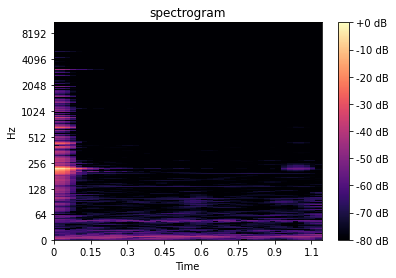

In [15]:
# p, sr = librosa.load('./A3_piano.wav', sr = 176400)
p, sr = librosa.load('./A3_piano.wav')
k = 32768
h = int(k/8)
P = librosa.stft(p, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_P = np.abs(P)
librosa.display.specshow(librosa.amplitude_to_db(abs_P, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [16]:
P.shape

(16385, 47)

222.0611572265625 2
444.122314453125 3
666.1834716796875 4
888.24462890625 5
1110.3057861328125 6
1332.366943359375 7
1554.4281005859375 8
1776.4892578125 9
1998.5504150390625 10
2220.611572265625 11
2442.6727294921875 12
2664.73388671875 13
2886.7950439453125 14
3108.856201171875 15
3330.9173583984375 16
3552.978515625 17
3775.0396728515625 18
3997.100830078125 19
4219.1619873046875 20


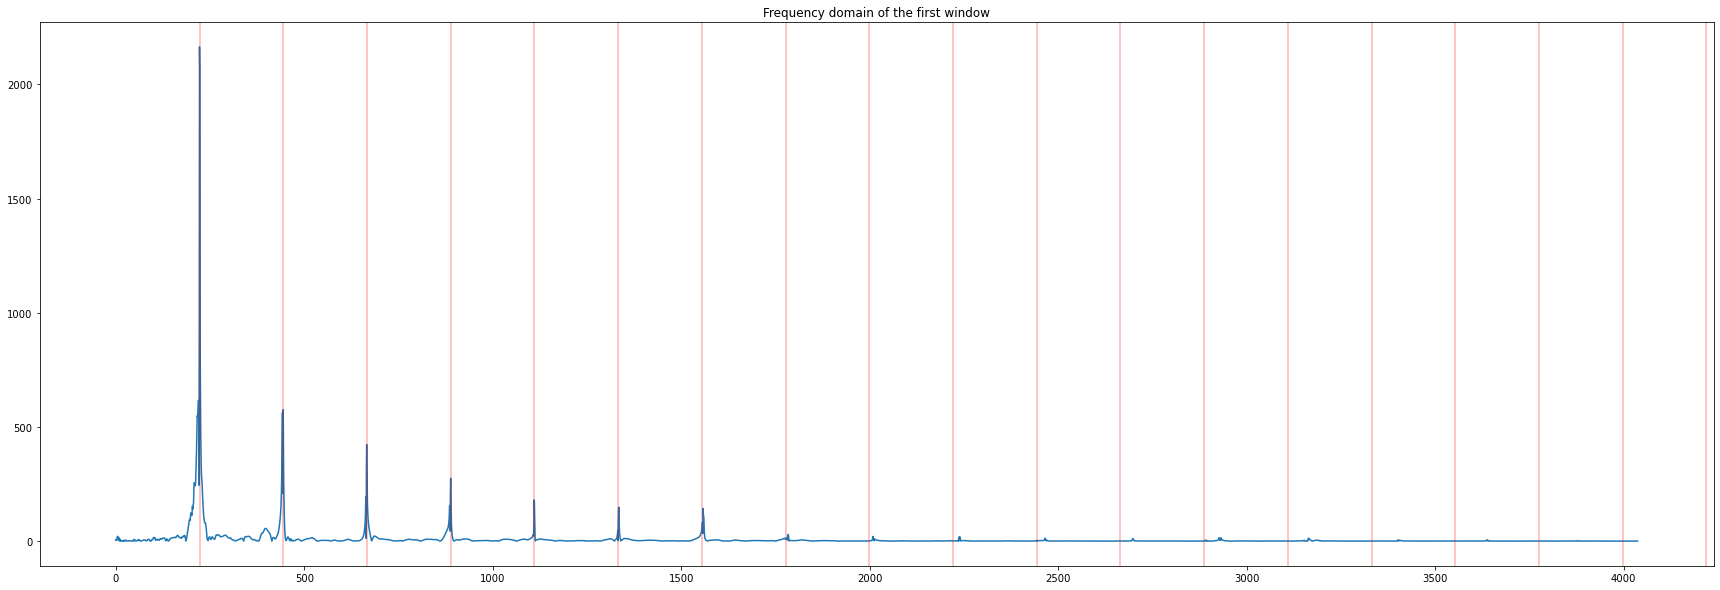

In [17]:
W_P = abs_P[:6000, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_P = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
plt.plot(freq_P[:6000], W_P)
plt.title('Frequency domain of the first window')

for i in range(0, len(W_P), 1):
    if W_P[i] > 1000 and W_P[i - 1] < W_P[i] and W_P[i] > W_P[i + 1]:
        base_freq = freq_P[i]
        break

# base_freq=223
i = 1
freq = 0
while freq < 4000:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    print(freq, i)
 
plt.savefig("./" +'Figure3'+".png")
plt.show()

# Another Recorder

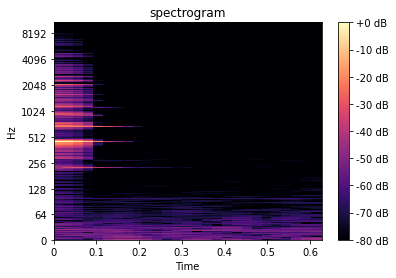

In [19]:
b, sr = librosa.load('./06.22 IV_results/sound_files/#A3_edited.wav')
k = 32768
h = int(k/8)
B = librosa.stft(b, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_B = np.abs(B)
librosa.display.specshow(librosa.amplitude_to_db(abs_B, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

230.1361083984375 2
460.272216796875 3
690.4083251953125 4
920.54443359375 5
1150.6805419921875 6
1380.816650390625 7
1610.9527587890625 8
1841.0888671875 9
2071.2249755859375 10
2301.361083984375 11
2531.4971923828125 12
2761.63330078125 13
2991.7694091796875 14
3221.905517578125 15
3452.0416259765625 16
3682.177734375 17
3912.3138427734375 18
4142.449951171875 19
4372.5860595703125 20
4602.72216796875 21


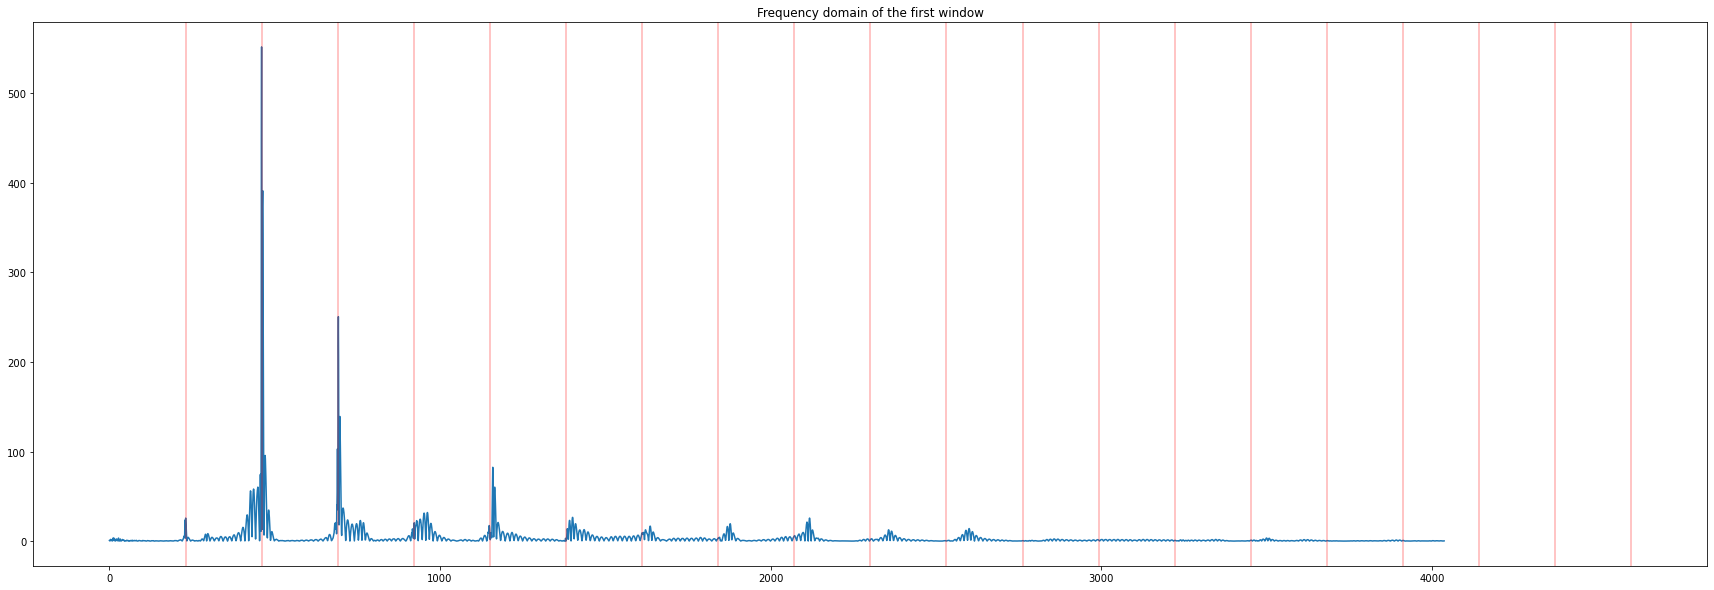

In [20]:
W_B = abs_B[:6000, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_B = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
plt.plot(freq_B[:6000], W_B)
plt.title('Frequency domain of the first window')


for i in range(0, len(W_B), 1):
    if W_B[i] > 400 and W_B[i - 1] < W_B[i] and W_B[i] > W_B[i + 1]:
        base_freq = freq_B[i]/2
        break

# base_freq=223
i = 1
freq = 0
while freq < 4400:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    print(freq, i)
    
    
plt.savefig("./" +'Figure4'+".png")
plt.show()

# Recoreded synthetic sine wave

/Users/yutianqin/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=32768 is too small for input signal of length=30870
  warnings.warn(


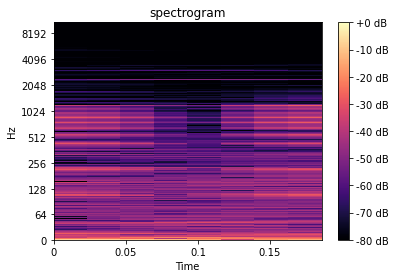

In [21]:
sw, sr = librosa.load('./Synthetic_waves.wav', sr = 44100)
k = 32768
h = int(k/8)
SW = librosa.stft(sw, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_SW = np.abs(SW)
librosa.display.specshow(librosa.amplitude_to_db(abs_SW, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

220 2
440 3
660 4
880 5
1100 6
1320 7
1540 8
1760 9
1980 10
2200 11
2420 12
2640 13
2860 14
3080 15
3300 16
3520 17


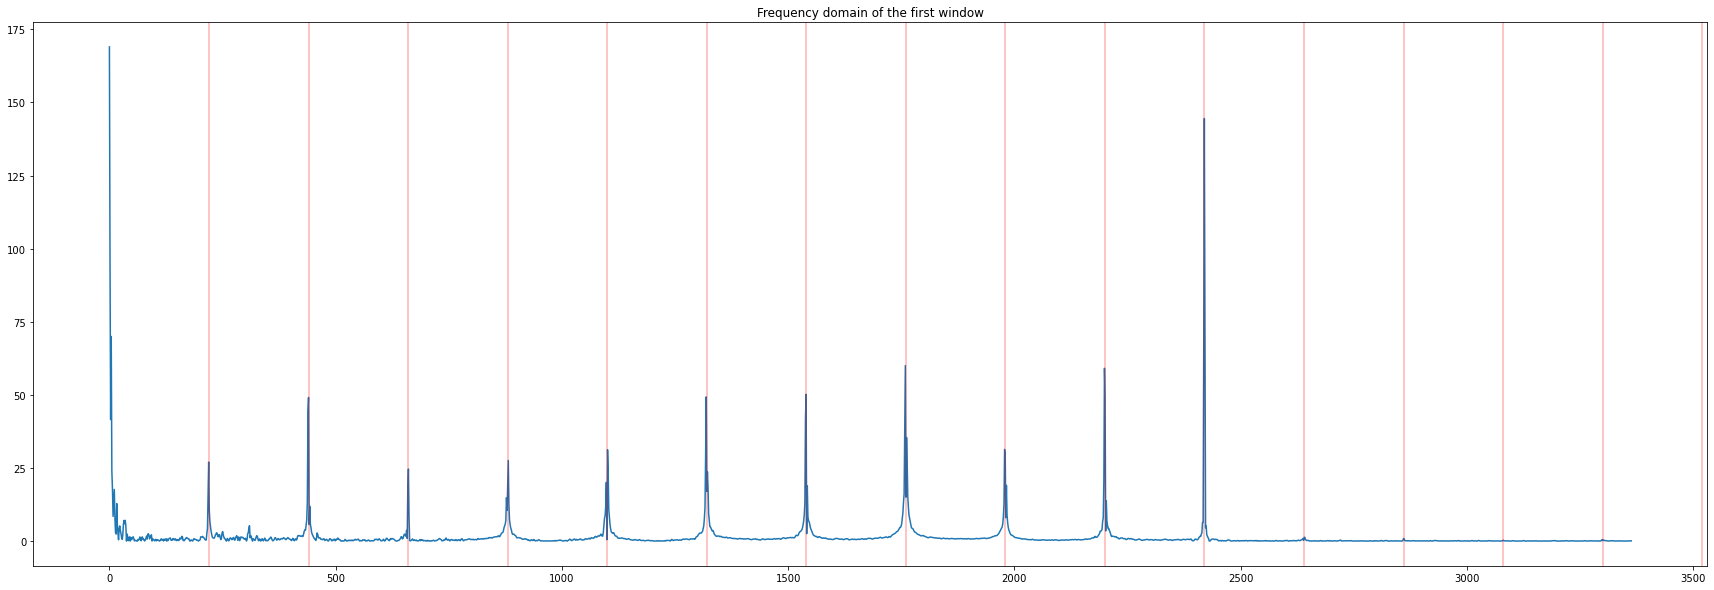

In [22]:
W_SW = abs_SW[:2500, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_SW = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
plt.plot(freq_SW[:2500], W_SW)
plt.title('Frequency domain of the first window')


# for i in range(0, len(W_SW), 1):
#     if W_SW[i] > 100 and W_SW[i - 1] < W_SW[i] and W_SW[i] > W_SW[i + 1]:
#         base_freq = freq_SW[i]
#         print (base_freq)
#         break

base_freq=220
i = 1
freq = 0
while freq < 3500:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    print(freq, i)
    
    
plt.savefig("./" +'Figure5'+".png")
plt.show()

# Duck

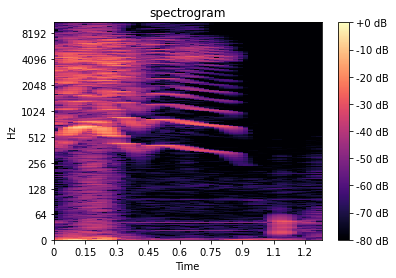

In [15]:
duck, sr = librosa.load('./duck.wav', sr = 44100)
k = 32768
h = int(k/8)
DUCK = librosa.stft(duck, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_DUCK = np.abs(DUCK)
librosa.display.specshow(librosa.amplitude_to_db(abs_DUCK, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [ ]:
W_DUCK = abs_DUCK[:2500, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_DUCK = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
plt.plot(freq_DUCK[:2500], W_DUCK)
plt.title('Frequency domain of the first window')


for i in range(0, len(W_SW), 1):
    if W_SW[i] > 200 and W_SW[i - 1] < W_SW[i] and W_SW[i] > W_SW[i + 1]:
        base_freq = freq_SW[i]
        print (base_freq)
        break

# base_freq=220
i = 1
freq = 0
while freq < 2400:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    print(freq, i)
    
plt.show()

## Change Sample rate to 44100

In [161]:
y, sr = librosa.load('./21111.wav', sr = 44100)
# A3 220Hz
print('length of input is', len(y), 'sample rate = ', sr)

length of input is 120004 sample rate =  44100


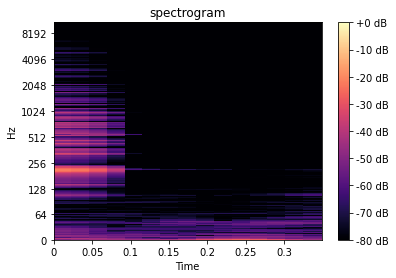

In [162]:
k = 65536
h = int(k/8)
A = librosa.stft(y, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_A = np.abs(A)
librosa.display.specshow(librosa.amplitude_to_db(abs_A, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [164]:
print(abs_A.shape)
print(len(abs_A[:, 0]))

(32769, 15)
32769


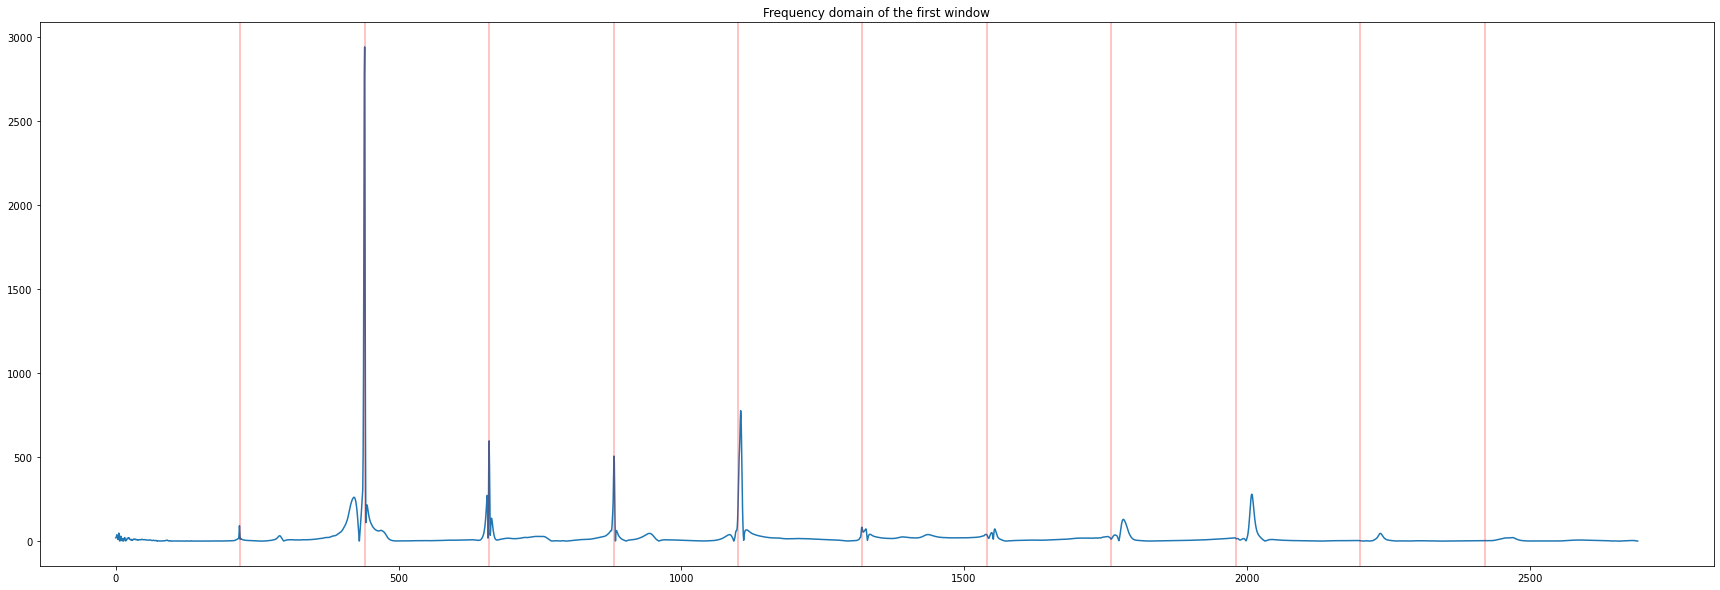

In [165]:
W_0 = abs_A[:4000, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_A = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
plt.plot(freq_A[:4000], W_0)
plt.title('Frequency domain of the first window')


for i in range(0, len(W_0), 1):
    if W_0[i] > 2000 and W_0[i - 1] < W_0[i] and W_0[i] > W_0[i + 1]:
        base_freq = freq_A[i]/2
        break
            
i = 1
freq = 0
while freq < 2400:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
#     print(freq, i)
    
plt.show()

In [166]:
for i in range(4000):
    print(i, freq_A[i], W_0[i])

0 0.0 19.536053
1 0.67291259765625 22.744421
2 1.3458251953125 31.426102
3 2.01873779296875 37.960056
4 2.691650390625 25.468204
5 3.36456298828125 13.621759
6 4.0374755859375 9.238869
7 4.71038818359375 18.782637
8 5.38330078125 47.697044
9 6.05621337890625 33.063286
10 6.7291259765625 1.0499256
11 7.40203857421875 0.4652428
12 8.074951171875 18.798115
13 8.74786376953125 29.331013
14 9.4207763671875 26.074518
15 10.09368896484375 16.436432
16 10.7666015625 3.6145089
17 11.43951416015625 1.6315926
18 12.1124267578125 14.775908
19 12.78533935546875 12.882454
20 13.458251953125 0.34018803
21 14.13116455078125 2.8308725
22 14.8040771484375 15.050345
23 15.47698974609375 21.266539
24 16.14990234375 19.256372
25 16.82281494140625 10.216432
26 17.4957275390625 1.044835
27 18.16864013671875 4.108721
28 18.841552734375 4.427419
29 19.51446533203125 11.12494
30 20.1873779296875 16.781504
31 20.86029052734375 17.160786
32 21.533203125 14.69827
33 22.20611572265625 15.45897
34 22.8790283203125 2

625 420.57037353515625 260.16037
626 421.2432861328125 261.08524
627 421.91619873046875 260.11835
628 422.589111328125 256.92398
629 423.26202392578125 251.36198
630 423.9349365234375 243.42578
631 424.60784912109375 232.49759
632 425.28076171875 217.61981
633 425.95367431640625 198.82721
634 426.6265869140625 176.81839
635 427.29949951171875 151.73112
636 427.972412109375 123.59798
637 428.64532470703125 93.00409
638 429.3182373046875 61.219944
639 429.99114990234375 30.02523
640 430.6640625 0.20791298
641 431.33697509765625 30.805029
642 432.0098876953125 62.382664
643 432.68280029296875 94.31484
644 433.355712890625 126.81303
645 434.02862548828125 160.61401
646 434.7015380859375 197.295
647 435.37445068359375 238.48456
648 436.04736328125 276.45416
649 436.72027587890625 306.70224
650 437.3931884765625 518.822
651 438.06610107421875 1007.3143
652 438.739013671875 1783.9415
653 439.41192626953125 2775.9407
654 440.0848388671875 2943.4883
655 440.75775146484375 1870.4341
656 441.4306

1291 868.7301635742188 37.454884
1292 869.403076171875 39.26198
1293 870.0759887695312 41.17605
1294 870.7489013671875 43.237324
1295 871.4218139648438 45.433968
1296 872.0947265625 47.985962
1297 872.7676391601562 50.79914
1298 873.4405517578125 53.55431
1299 874.1134643554688 56.0053
1300 874.786376953125 58.962513
1301 875.4592895507812 62.622097
1302 876.1322021484375 62.20096
1303 876.8051147460938 65.215294
1304 877.47802734375 89.30134
1305 878.1509399414062 131.65718
1306 878.8238525390625 175.8469
1307 879.4967651367188 235.61507
1308 880.169677734375 368.43658
1309 880.8425903320312 506.4277
1310 881.5155029296875 470.10483
1311 882.1884155273438 281.94522
1312 882.861328125 104.10076
1313 883.5342407226562 0.59281707
1314 884.2071533203125 47.708828
1315 884.8800659179688 62.631397
1316 885.552978515625 62.52034
1317 886.2258911132812 56.456272
1318 886.8988037109375 49.1563
1319 887.5717163085938 42.7397
1320 888.24462890625 37.671513
1321 888.9175415039062 33.549564
1322 8

1958 1317.5628662109375 34.48498
1959 1318.2357788085938 60.946857
1960 1318.90869140625 81.70983
1961 1319.5816040039062 81.84891
1962 1320.2545166015625 69.266426
1963 1320.9274291992188 58.691895
1964 1321.600341796875 54.063145
1965 1322.2732543945312 53.6291
1966 1322.9461669921875 56.549606
1967 1323.6190795898438 60.358925
1968 1324.2919921875 63.235115
1969 1324.9649047851562 66.564064
1970 1325.6378173828125 70.8685
1971 1326.3107299804688 72.615135
1972 1326.983642578125 66.10019
1973 1327.6565551757812 48.97335
1974 1328.3294677734375 25.78096
1975 1329.0023803710938 3.905217
1976 1329.67529296875 12.675217
1977 1330.3482055664062 23.956377
1978 1331.0211181640625 31.292038
1979 1331.6940307617188 35.936913
1980 1332.366943359375 38.685413
1981 1333.0398559570312 40.073627
1982 1333.7127685546875 40.52096
1983 1334.3856811523438 40.172333
1984 1335.05859375 39.193283
1985 1335.7315063476562 37.877518
1986 1336.4044189453125 36.355537
1987 1337.0773315429688 34.71998
1988 133

2624 1765.72265625 35.704544
2625 1766.3955688476562 36.465187
2626 1767.0684814453125 36.332523
2627 1767.7413940429688 35.608
2628 1768.414306640625 34.7995
2629 1769.0872192382812 34.089104
2630 1769.7601318359375 32.96335
2631 1770.4330444335938 30.627226
2632 1771.10595703125 26.608856
2633 1771.7788696289062 21.04839
2634 1772.4517822265625 14.346427
2635 1773.1246948242188 6.5959253
2636 1773.797607421875 2.3430836
2637 1774.4705200195312 12.649
2638 1775.1434326171875 24.719347
2639 1775.8163452148438 38.978172
2640 1776.4892578125 55.227818
2641 1777.1621704101562 72.37504
2642 1777.8350830078125 88.755135
2643 1778.5079956054688 102.86688
2644 1779.180908203125 113.89056
2645 1779.8538208007812 121.67432
2646 1780.5267333984375 126.520134
2647 1781.1996459960938 128.88666
2648 1781.87255859375 129.15712
2649 1782.5454711914062 127.64695
2650 1783.2183837890625 124.7021
2651 1783.8912963867188 120.7257
2652 1784.564208984375 116.0578
2653 1785.2371215820312 110.84881
2654 1785

3291 2214.5553588867188 0.8076245
3292 2215.228271484375 0.4664322
3293 2215.9011840820312 0.14312974
3294 2216.5740966796875 0.12714885
3295 2217.2470092773438 0.37999338
3296 2217.919921875 0.5888475
3297 2218.5928344726562 0.7473362
3298 2219.2657470703125 0.9000269
3299 2219.9386596679688 1.0657657
3300 2220.611572265625 1.2743162
3301 2221.2844848632812 1.5744267
3302 2221.9573974609375 2.0207744
3303 2222.6303100585938 2.6416137
3304 2223.30322265625 3.4559696
3305 2223.9761352539062 4.514377
3306 2224.6490478515625 5.766573
3307 2225.3219604492188 7.1197076
3308 2225.994873046875 8.540939
3309 2226.6677856445312 9.970722
3310 2227.3406982421875 11.388674
3311 2228.0136108398438 12.8527355
3312 2228.6865234375 14.464742
3313 2229.3594360351562 16.365492
3314 2230.0323486328125 18.654406
3315 2230.7052612304688 21.430658
3316 2231.378173828125 24.766922
3317 2232.0510864257812 28.585167
3318 2232.7239990234375 32.695312
3319 2233.3969116210938 36.786667
3320 2234.06982421875 40.46

3957 2662.7151489257812 0.7432341
3958 2663.3880615234375 0.87218136
3959 2664.0609741210938 1.010224
3960 2664.73388671875 1.1845477
3961 2665.4067993164062 1.350152
3962 2666.0797119140625 1.4861221
3963 2666.7526245117188 1.6444426
3964 2667.425537109375 1.794835
3965 2668.0984497070312 1.9257337
3966 2668.7713623046875 2.0588667
3967 2669.4442749023438 2.1732504
3968 2670.1171875 2.2639372
3969 2670.7901000976562 2.3345134
3970 2671.4630126953125 2.3943686
3971 2672.1359252929688 2.4550834
3972 2672.808837890625 2.5274403
3973 2673.4817504882812 2.6190302
3974 2674.1546630859375 2.710815
3975 2674.8275756835938 2.8018913
3976 2675.50048828125 2.925983
3977 2676.1734008789062 3.0653133
3978 2676.8463134765625 3.1803482
3979 2677.5192260742188 3.282907
3980 2678.192138671875 3.3810833
3981 2678.8650512695312 3.4644673
3982 2679.5379638671875 3.532204
3983 2680.2108764648438 3.5779185
3984 2680.8837890625 3.5848763
3985 2681.5567016601562 3.586571
3986 2682.2296142578125 3.5785394
398

In [167]:
for i in range(1000):
    if freq_A[i]<222 and freq_A[i]>218:
        print(freq_A[i], W_0[i])

218.023681640625 46.78917
218.69659423828125 91.200165
219.3695068359375 50.733906
220.04241943359375 10.522142
220.71533203125 16.742987
221.38824462890625 12.96614


In [168]:
for i in range(0, len(W_0), 1):
        if W_0[i] > 200 and W_0[i - 1] < W_0[i] \
                and W_0[i] > W_0[i + 1]:
            print(freq_A[i], W_0[i])

421.2432861328125 261.08524
440.0848388671875 2943.4883
444.122314453125 215.707
656.7626953125 271.99454
660.1272583007812 596.9329
880.8425903320312 506.4277
1104.9224853515625 777.24207
2008.6441040039062 279.20685


# Lower Accuracy: 


$ Sample rate = 176400, n_fft = 2^15= 16384 $

The window duration will be $ (16384/176400)/4  $

$ Accuracy = sr/(n _  fft+2) = 10... $ 

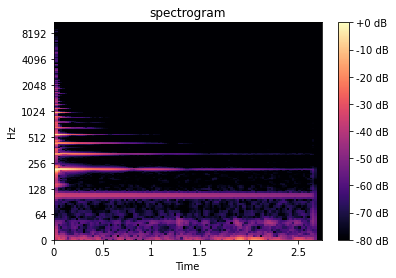

In [153]:
k = 4096
h = int(k/4)
A = librosa.stft(y, n_fft=k, hop_length = h, win_length = k, window='hann')
abs_A = np.abs(A)
librosa.display.specshow(librosa.amplitude_to_db(abs_A, ref=np.max), y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [154]:
print(abs_A.shape)
print(len(abs_A[:, 0]))

(2049, 118)
2049


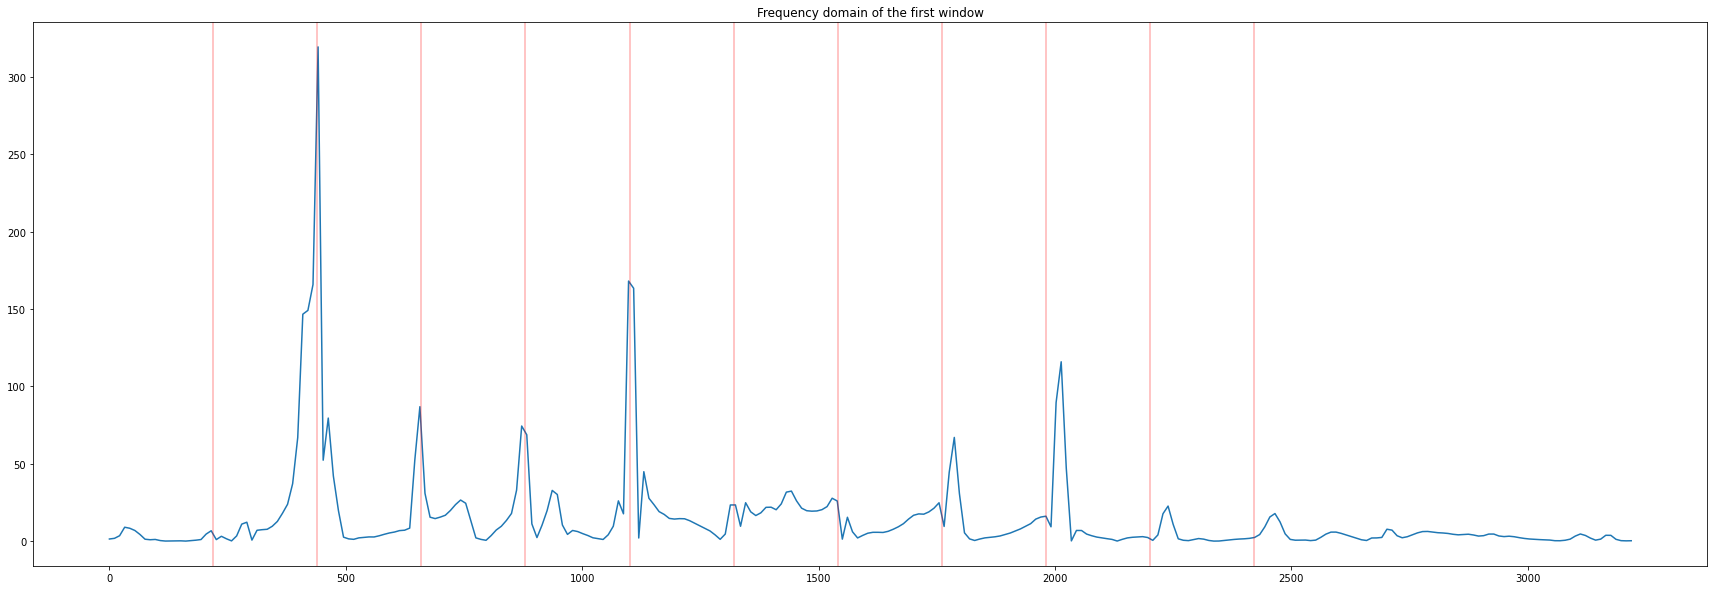

In [155]:
W_0 = abs_A[:300, 0]
# freq_A = np.linspace(0, sr/2, len(abs_A))
freq_A = librosa.fft_frequencies(sr=sr, n_fft=k)


plt.figure(figsize=(30, 10))
plt.plot(freq_A[:300], W_0)
plt.title('Frequency domain of the first window')


for i in range(0, len(W_0), 1):
    if W_0[i] > 2000 and W_0[i - 1] < W_0[i] and W_0[i] > W_0[i + 1]:
        base_freq = freq_A[i]/2
        break
            
i = 1
freq = 0
while freq < 2400:
    freq = base_freq * i
    plt.axvline(x=freq, color='r', alpha=0.3)
    i += 1
    #print(freq, i)
    
plt.show()

In [156]:
print(freq_A[:5])

[ 0.         10.76660156 21.53320312 32.29980469 43.06640625]


# Slow Fourier Transform

In [263]:
slow_signal, SR = librosa.load('./G3_52.wav', sr = 44100)

In [264]:
import scipy
from numpy import pi
TWO_PI = np.pi * 2

In [265]:
PAGE_LEN = 1024
# PAGE_LEN = 65536
# SR = 22050
DTYPE = np.float32
N_HARMONICS = 12

HANN = scipy.signal.get_window('hann', PAGE_LEN, True)
IMAGINARY_LADDER = np.linspace(0, TWO_PI * 1j, PAGE_LEN)
SPECTRUM_SIZE = PAGE_LEN // 2 + 1
NYQUIST = SR // 2

In [266]:
def slow_f_t(signal, freq_bin):
    return np.abs(np.sum(signal * np.exp(IMAGINARY_LADDER * freq_bin))) / PAGE_LEN

In [267]:
sig = slow_signal[:1024]

In [268]:
slow_f_t(sig, 1)

0.004309601992937335

In [ ]:
y, sr = librosa.load('/Users/yutianqin/Downloads/SchoolWork/.wav', sr = 176400)